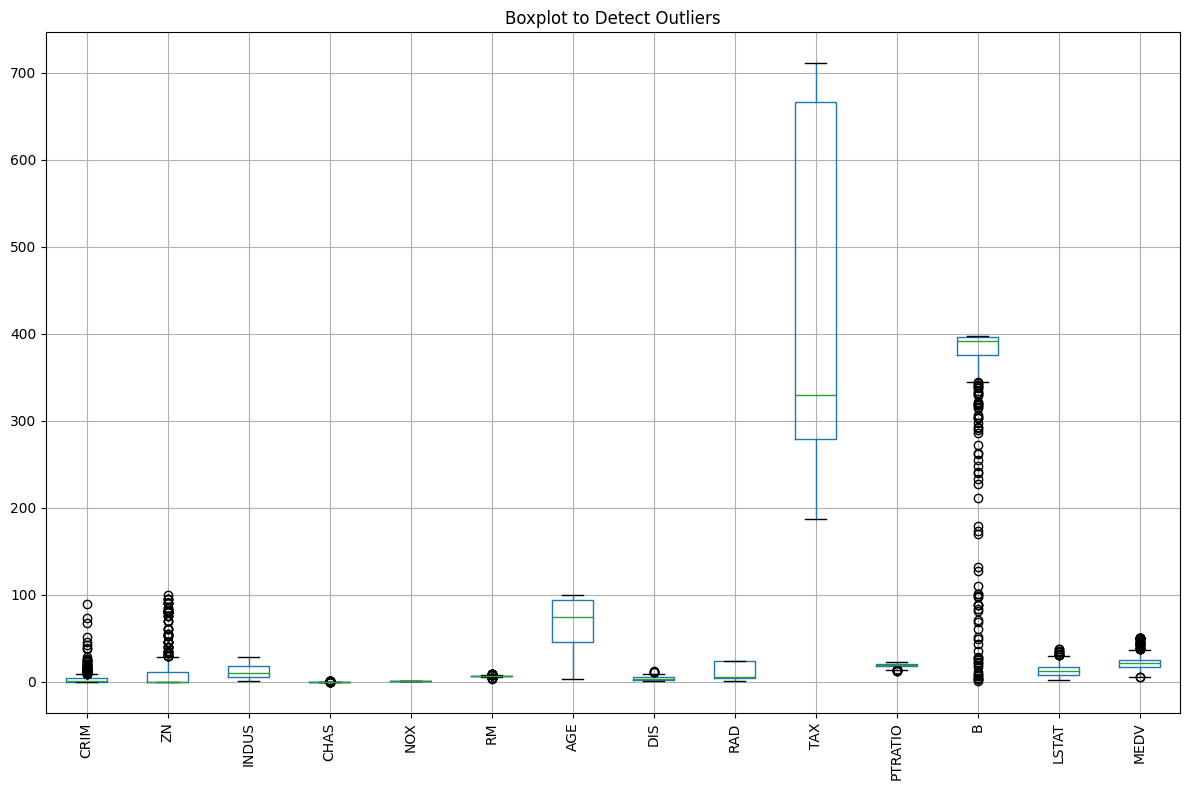

Model Performance:

Linear Regression => MSE: 25.02, R2 Score: 0.659
Decision Tree => MSE: 11.67, R2 Score: 0.841
Gradient Boosting => MSE: 7.36, R2 Score: 0.900


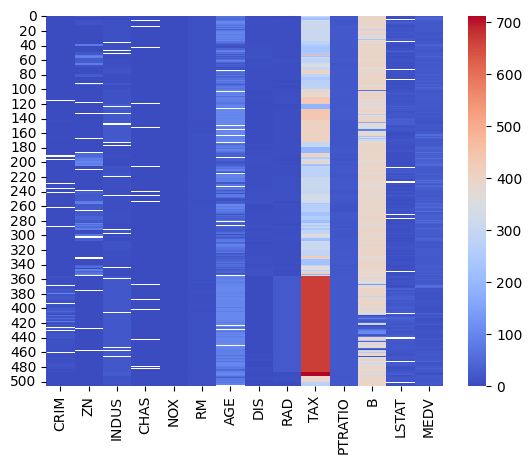

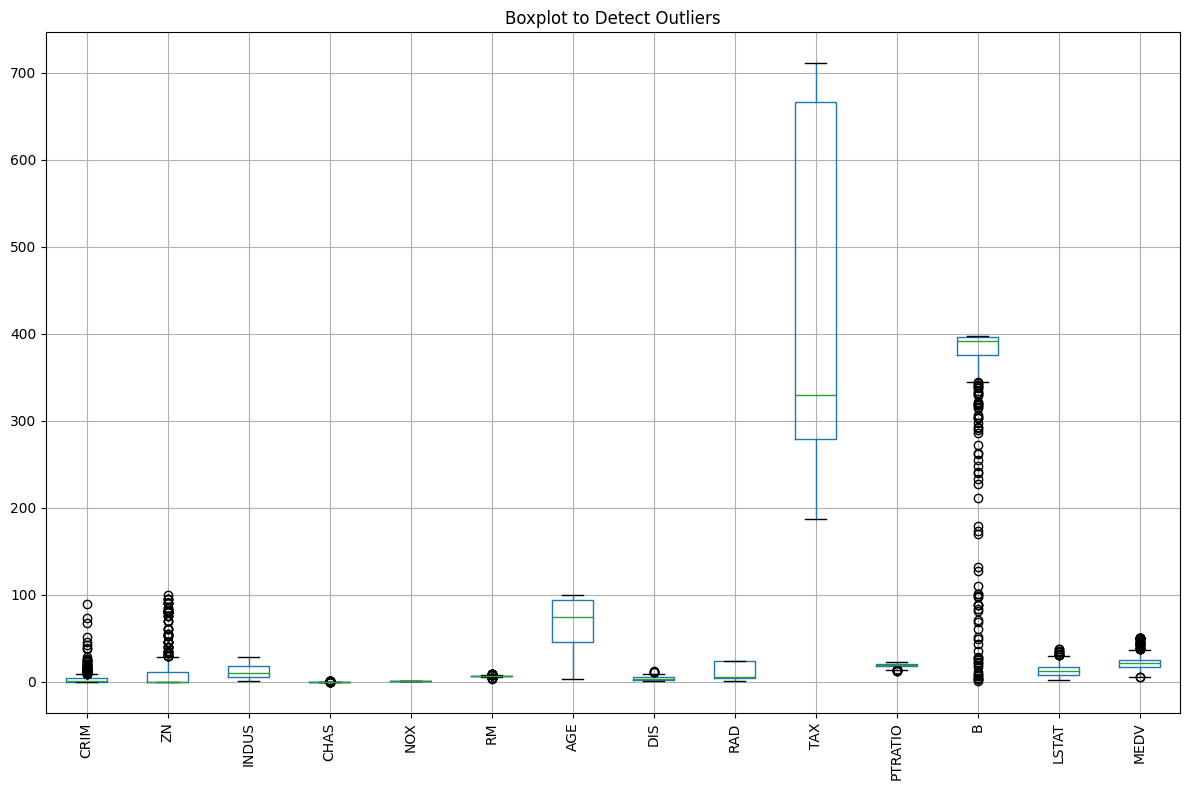


Model Performance:

Linear Regression => MSE: 25.02, R2 Score: 0.6589
Decision Tree => MSE: 11.67, R2 Score: 0.8409
Gradient Boosting => MSE: 7.36, R2 Score: 0.8996

Linear Regression Prediction Equation:

MEDV = 27.9125 + (-0.1141 * CRIM) + (0.0290 * ZN) + (-0.0271 * INDUS) + (3.2407 * CHAS) + (-16.0175 * NOX) + (4.7524 * RM) + (-0.0195 * AGE) + (-1.5216 * DIS) + (0.2228 * RAD) + (-0.0092 * TAX) + (-0.8860 * PTRATIO) + (0.0123 * B) + (-0.4384 * LSTAT)


In [10]:

# Boston House Price Prediction with Prediction Equation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('HousingData.csv')  

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Data Visualization
    #checking correlation
sns.heatmap(df,cmap='coolwarm')

plt.figure(figsize=(12, 8))
df_imputed.boxplot(rot=90)
plt.title("Boxplot to Detect Outliers")
plt.tight_layout()
plt.show()

# Prepare data
X = df_imputed.drop('MEDV', axis=1)
y = df_imputed['MEDV']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2 Score": r2}

# Print evaluation metrics
print("\nModel Performance:\n")
for model_name, scores in results.items():
    print(f"{model_name} => MSE: {scores['MSE']:.2f}, R2 Score: {scores['R2 Score']:.4f}")

# LINEAR REGRESSION EQUATION

print("\nLinear Regression Prediction Equation:\n")

lin_reg = models["Linear Regression"]
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

equation = f"MEDV = {intercept:.4f}"
for feature, coef in zip(X.columns, coefficients):
    equation += f" + ({coef:.4f} * {feature})"

print(equation)
